In [74]:
import pandas as pd

In [75]:
import sqlite3

In [76]:
import matplotlib.pyplot as plt

In [77]:
import seaborn as sns

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
from sklearn.linear_model import Lasso

In [81]:
from sklearn import metrics

In [82]:
df = pd.read_csv("C:/Users/MT/Desktop/car data.csv")

In [83]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [84]:
df['Selling_Price']=df['Selling_Price']*100000

In [85]:
df['Present_Price']=df['Present_Price']*100000

In [86]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,335000.0,559000.0,27000,Petrol,Dealer,Manual,0
1,sx4,2013,475000.0,954000.0,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,725000.0,985000.0,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,285000.0,415000.0,5200,Petrol,Dealer,Manual,0
4,swift,2014,460000.0,687000.0,42450,Diesel,Dealer,Manual,0


In [87]:
df.shape

(301, 9)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [89]:
df['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [90]:
df['Selling_Price'].max()

3500000.0

In [91]:
df['Selling_Price'].min()

10000.0

In [92]:
df.loc[(df ['Selling_Price'] == 35.0)]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner


In [93]:
#check the distribution of categorical data
df.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [94]:
#encoding categorical data
df.Transmission.replace({'Manual':0,'Automatic':1},inplace=True)

In [95]:
df.Fuel_Type.replace({'Petrol':0,'Diesel':1,'CNG':2},inplace=True)

In [96]:
df.Selling_type.replace({'Dealer':0,'Individual':1},inplace=True)

In [97]:
X =df.drop(['Selling_Price','Car_Name'],axis=1)
Y=df['Selling_Price']

In [102]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

In [104]:
lin =LinearRegression()
lin.fit(X_train,Y_train)

LinearRegression()

In [112]:
#evaluate the model

In [119]:
#predict on train
train_predict = lin.predict(X_train)

In [120]:
#r square error
error_score_lin_train = metrics.r2_score(Y_train,train_predict)

In [121]:
error_score_lin_train

0.8796483009370204

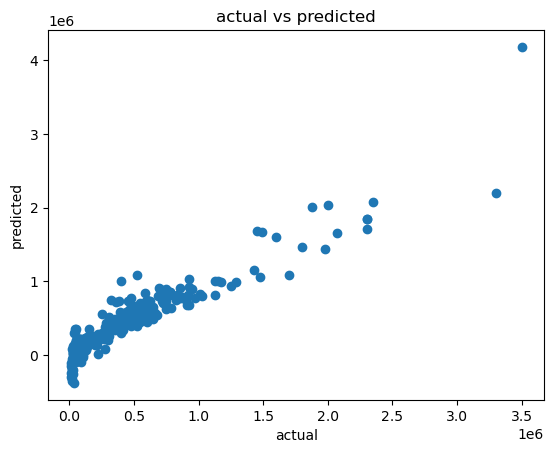

In [122]:
#visualize the actual price and predicted price
plt.scatter(Y_train,train_predict)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('actual vs predicted')
plt.show()

In [123]:
# predict on test data
test_predict = lin.predict(X_test)

In [124]:
#compare between 2 outputs
error_score_lin_test = metrics.r2_score(Y_test,test_predict)

In [125]:
error_score_lin_test

0.8365861023209941

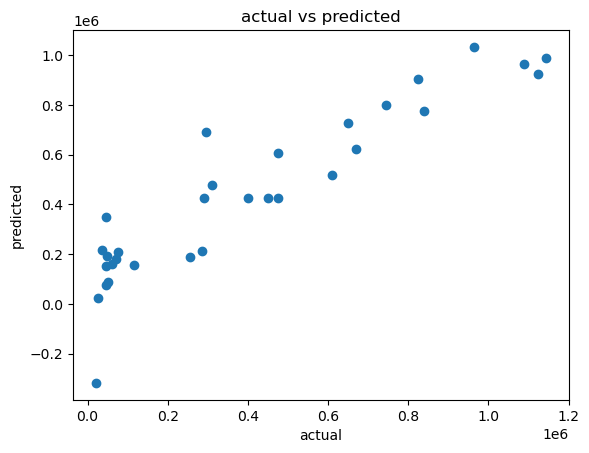

In [126]:
plt.scatter(Y_test,test_predict)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('actual vs predicted')
plt.show()

Lasso regression
